In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [15]:
def make_data():
    data_dir = ''

    categories = ['Dog', 'Cat']

    data = []

    for idx, category in enumerate(categories):
        path = os.path.join(data_dir, category)  

        label = idx

        for img_name in os.listdir(path):
            image_path = os.path.join(path, img_name)
            image = cv2.imread(image_path)

            try:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (224, 224))
                image = np.array(image, dtype=np.float32) #(224, 224, 3)
                data.append([image, label])
            except Exception as e:
                pass


    pik = open('data.pickle', 'wb')
    pickle.dump(data, pik)
    pik.close()

In [16]:
make_data()

In [17]:
def load_data():
    pick = open("data.pickle", 'rb')
    data = pickle.load(pick)
    pick.close()

    np.random.shuffle(data)

    feature = []
    labels = []

    for img, label in data:
        feature.append(img)
        labels.append(label)

    feature = np.array(feature, dtype=np.float32)
    labels = np.array(labels)

    feature = feature/feature.max()

    return [feature, labels]

In [18]:
def bulid_model():
    (feature, labels) = load_data()

    x_train, x_test, y_train, y_test = train_test_split(
        feature, labels, test_size=0.1)

    categories = categories = ['Dog', 'Cat']

    input_layer = tf.keras.layers.Input([224, 224, 3])

    conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), padding="same",
                                  activation='relu')(input_layer)

    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same",
                                  activation='relu')(pool1)

    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv2)

    conv3 = tf.keras.layers.Conv2D(filters=96, kernel_size=(3, 3), padding="same",
                                  activation='relu')(pool2)

    pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv3)

    conv4 = tf.keras.layers.Conv2D(filters=96, kernel_size=(3, 3), padding="same",
                                  activation='relu')(pool3)

    pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv4)

    flt1 = tf.keras.layers.Flatten()(pool4)

    dn1 = tf.keras.layers.Dense(512, activation='relu')(flt1)
    out = tf.keras.layers.Dense(5, activation='softmax')(dn1)

    model = tf.keras.Model(input_layer, out)

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(x_train, y_train, batch_size=100, epochs=10)

    model.save('mymodel.h5')

In [19]:
bulid_model()

Epoch 1/10
33/33 [==============================] - 315s 10s/step - loss: 0.6863 - accuracy: 0.6616
Epoch 2/10
33/33 [==============================] - 312s 9s/step - loss: 0.6011 - accuracy: 0.7036
Epoch 3/10
33/33 [==============================] - 312s 9s/step - loss: 0.5739 - accuracy: 0.7155
Epoch 4/10
33/33 [==============================] - 312s 9s/step - loss: 0.5306 - accuracy: 0.7560
Epoch 5/10
33/33 [==============================] - 312s 9s/step - loss: 0.4885 - accuracy: 0.7672
Epoch 6/10
33/33 [==============================] - 310s 9s/step - loss: 0.4990 - accuracy: 0.7663
Epoch 7/10
33/33 [==============================] - 311s 9s/step - loss: 0.4489 - accuracy: 0.7934
Epoch 8/10
33/33 [==============================] - 312s 9s/step - loss: 0.4098 - accuracy: 0.8205
Epoch 9/10
33/33 [==============================] - 312s 9s/step - loss: 0.3624 - accuracy: 0.8417
Epoch 10/10
33/33 [==============================] - 311s 9s/step - loss: 0.3206 - accuracy: 0.8638


In [20]:
def detect():
    (feature, labels) = load_data()
    
    x_train, x_test, y_train, y_test = train_test_split(
        feature, labels, test_size=0.2)
    
    categories = ['Dog', 'Cat']
    
    model = tf.keras.models.load_model('mymodel.h5')
    
    #model.evaluate(x_test, y_test, verbose = 1)
    
    prediction = model.predict(x_test)
    output_size = min(9,len(prediction))
    
    plt.figure(figsize=(9,9))
    for i in range(output_size):
        plt.subplot(3,3,i+1)
        plt.imshow(x_test[i])
        plt.xlabel('Actual:' + categories[y_test[i]] + '\n' +
                   'Predicted:' + categories[np.argmax(prediction[i])])
        
        plt.xticks([])
    
    plt.show()

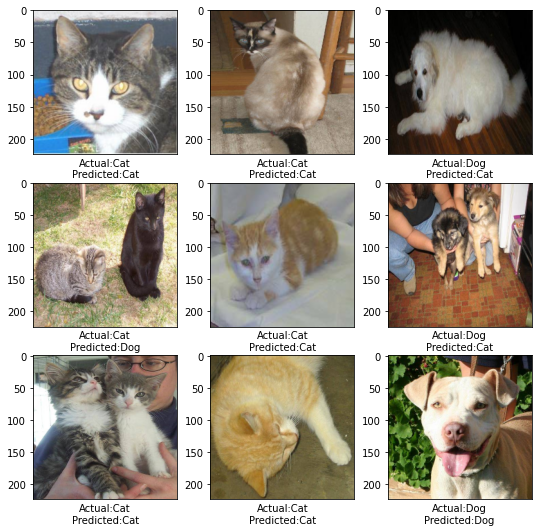

In [21]:
detect()